<a href="https://colab.research.google.com/github/ipejun-ai/m5-accuracy/blob/master/event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime as dt
import gc
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls gdrive/

'My Drive'


In [0]:
DIRPATH="/content/gdrive/My Drive/kaggle/"
#DIRPATH="C:/Users/peiju/Documents/Study/kaggle/m5-forecasting-accuracy/"

In [0]:
df_val=pd.read_csv(DIRPATH+"/calendar.csv")

eventを横持ちに

In [0]:
########event1 event2 change to event type
df_event=df_val[["d","date","event_name_1","event_name_2"]]

df_event_1=df_val[["d","date","event_name_1","event_type_1"]]
df_event_2=df_val[["d","date","event_name_2","event_type_2"]]


for event_type in set(df_event_1["event_type_1"]):
  df_event_1.loc[df_event_1["event_type_1"]==event_type,event_type]=df_event_1["event_name_1"]

for event_type in set(df_event_2["event_type_2"]):
  df_event_2.loc[df_event_2["event_type_2"]==event_type,event_type]=df_event_2["event_name_2"]


df_event_3=df_event_1.copy()
df_event_3["Cultural"]=df_event_1["Cultural"]+df_event_2["Cultural"]
df_event_3["Religious"]=df_event_1["Religious"]+df_event_2["Religious"]
df_event_3=df_event_3[["d",'Cultural', 'National', 'Religious', 'Sporting']]



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df_event_3.to_pickle("/content/gdrive/My Drive/kaggle/df_event_type.pickle.gz",compression='gzip')

In [0]:
#イベント当日を100
df_event=df_event.drop_duplicates()
df_event["count"]=100


In [0]:
df_event_1=df_event[["d","event_name_1","count"]].pivot_table(index="d",columns="event_name_1",values="count",aggfunc="count")
df_event_2=df_event[["d","event_name_2","count"]].pivot_table(index="d",columns="event_name_2",values="count",aggfunc="count")


In [0]:
df_event_1=pd.merge(df_event["d"],df_event_1,how="left",left_on="d",right_on="d")
df_event_2=pd.merge(df_event["d"],df_event_2,how="left",left_on="d",right_on="d")

In [0]:
df_event_3=pd.concat([df_event_1,df_event_2])


In [0]:
f_hundred= lambda x: x*100 if x  == 1 else 0
date=df_event_3["date"]
df_event_3=df_event_3.applymap(f_hundred)
df_event_3["date"]=date

In [0]:
df_event_3[df_event_3["Christmas"]==100]

,date,Chanukah End,Christmas,Cinco De Mayo,ColumbusDay,Easter,Eid al-Fitr,EidAlAdha,Father's day,Halloween,IndependenceDay,LaborDay,LentStart,LentWeek2,MartinLutherKingDay,MemorialDay,Mother's day,NBAFinalsEnd,NBAFinalsStart,NewYear,OrthodoxChristmas,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
331,2011-12-25,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,2012-12-25,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,2013-12-25,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,2014-12-25,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,2015-12-25,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_event_4=df_event_3.fillna(0)
df_event_4=df_event_4.rolling(31, center=True).sum()
df_event_4=df_event_4.rolling(31, center=True).mean()
df_event_4=pd.merge(df_event_3["date"],df_event_4,how="left",left_index=True,right_index=True)
df_event_4=df_event_4.fillna(0)
df_event_4=df_event_4.drop("date",axis=1)
df_event_4.head()
df_event_4=df_event_4.astype("int16")
df_event_4["date"]=pd.to_datetime(date)
#df_event_4.to_pickle("/content/gdrive/My Drive/kaggle/df_event.pickle.gz",compression='gzip')

In [0]:
df_event_4.shape

(1974, 31)

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

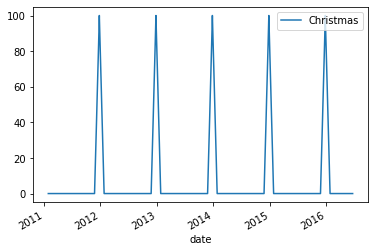

In [0]:
df_event_4.plot(x="date",y="Christmas")

In [0]:
#イベント終了後を0に
def f_minus(df,event):
  df["diff"]=df[event].diff(1)
  df[event].where(df["diff"]>0, 0, inplace=True)
  return df
  
  
  

In [0]:
date=df_event_4["date"]
df_event_4=df_event_4.drop("date",axis=1)
for column in df_event_4.columns:
    df_event_4=f_minus(df_event_4,column)
df_event_4["date"]=date

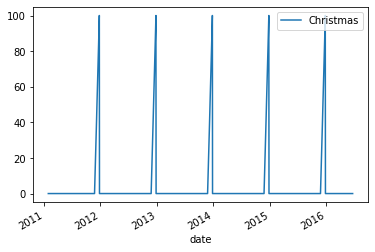

In [0]:
df_event_4.plot(x="date",y="Christmas")

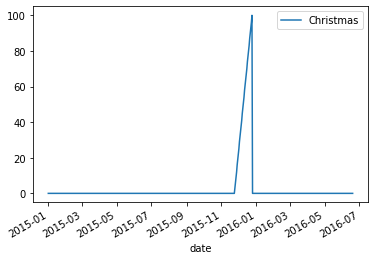

In [0]:

df_event_4[df_event_4["date"]>=dt.datetime(2015, 1, 1, 0, 0)].plot(x="date",y="Christmas")

In [0]:
df_event_4["NBAFinals"]=(df_event_4["NBAFinalsStart"]+df_event_4["NBAFinalsEnd"])/2

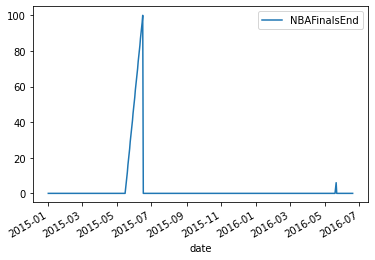

In [0]:

df_event_4[df_event_4["date"]>=dt.datetime(2015, 1, 1, 0, 0)].plot(x="date",y="NBAFinalsEnd")

In [0]:
def sum_types(df):
    df_event_4["Sports"]=df_event_4["NBAFinals"]+df_event_4["SuperBowl"]
    religious_col=["LentStart","LentWeek2","Purim End","OrthodoxEaster","Pesach End","Ramadan starts","Eid al-Fitr","EidAlAdha","Chanukah End","OrthodoxChristmas"]
    df_event_4["Religious"]=df_event_4[religious_col].sum(axis=1)
    national_col=["PresidentsDay","MemorialDay","IndependenceDay","LaborDay","ColumbusDay","VeteransDay","Thanksgiving","Christmas","NewYear","MartinLutherKingDay"]
    df_event_4["National"]=df_event_4[national_col].sum(axis=1)
    culture_col=["ValentinesDay","StPatricksDay","Cinco De Mayo","Mother's day","Father's day","Halloween","Easter"]
    df_event_4["Cultural"]=df_event_4[culture_col].sum(axis=1)
    return df

In [0]:
df_event_4=sum_types(df_event_4)

In [0]:
df_val=pd.read_csv(DIRPATH+"/calendar.csv")

In [0]:
df_event1=df_val[["date","event_name_1","event_type_1"]].pivot_table(index="date",columns="event_type_1",values="event_name_1",aggfunc="first")
df_event2=df_val[["date","event_name_2","event_type_2"]].pivot_table(index="date",columns="event_type_2",values="event_name_2",aggfunc="first")

In [0]:
df_event1.columns=['Cultural', 'National', 'Religious', 'Sports']
df_event2.columns=['Cultural', 'Religious']
df_event1.loc[df_event1.Cultural.isnull(),"Cultural"]=df_event2.Cultural
df_event1.loc[df_event1.Religious.isnull(),"Religious"]=df_event2.Religious

In [0]:
df_event1=df_event1.reset_index()

In [0]:
df_event1["date"]=pd.to_datetime(df_event1["date"])
df_event_4=pd.merge(df_event_4,df_event1,how="left",left_on="date",right_on="date",suffixes=['_value', '_name'])

In [0]:
pd.concat([df_val[["d"]],df_event_4],axis=1)

,d,Chanukah End,Christmas,Cinco De Mayo,ColumbusDay,Easter,Eid al-Fitr,EidAlAdha,Father's day,Halloween,IndependenceDay,LaborDay,LentStart,LentWeek2,MartinLutherKingDay,MemorialDay,Mother's day,NBAFinalsEnd,NBAFinalsStart,NewYear,OrthodoxChristmas,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay,diff,date,NBAFinals,Sports_value,Religious_value,National_value,Cultural_value,Cultural_name,National_name,Religious_name,Sports_name
0,d_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2011-01-29,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
1,d_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2011-01-30,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
2,d_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2011-01-31,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
3,d_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2011-02-01,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
4,d_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2011-02-02,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2016-06-16,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
1970,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2016-06-17,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
1971,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2016-06-18,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
1972,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2016-06-19,0.0,0.0,0,0,0,Father's day,NaN,NaN,NBAFinalsEnd


In [0]:
df_event_4.to_pickle(DIRPATH+"output/event/df_event.pickle.gz",compression='gzip')

In [0]:
df_event_4.columns

Index(['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay', 'Easter',
       'Eid al-Fitr', 'EidAlAdha', 'Father's day', 'Halloween',
       'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', 'Mother's day', 'NBAFinalsEnd',
       'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas', 'OrthodoxEaster',
       'Pesach End', 'PresidentsDay', 'Purim End', 'Ramadan starts',
       'StPatricksDay', 'SuperBowl', 'Thanksgiving', 'ValentinesDay',
       'VeteransDay', 'diff', 'date', 'NBAFinals', 'Sports_value',
       'Religious_value', 'National_value', 'Cultural_value', 'Cultural_name',
       'National_name', 'Religious_name', 'Sports_name'],
      dtype='object')

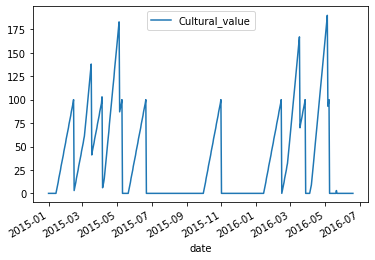

In [0]:
df_event_4[df_event_4["date"]>=dt.datetime(2015, 1, 1, 0, 0)].plot(x="date",y="Cultural_value")